# Getting, parsing, and training NYT articles to find most similar words

In [130]:
# packages for getting and parsing content
import os
import csv, json
import datetime
import urllib, requests
from time import sleep
from bs4 import BeautifulSoup
from nytimesarticle import articleAPI
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import string

In [ ]:
# packages for calculating word embeddings and charting
from gensim.models import Word2Vec
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout

In [ ]:
api = articleAPI(key)

### Getting & parsing data obtained via the NYT API

In [75]:
# Reference: http://dlab.berkeley.edu/blog/scraping-new-york-times-articles-python-tutorial

def parse_articles(articles):
    news = []
    for i in articles['response']['docs']:
        dic = {}
        dic['id'] = i['_id']
        dic['headline'] = i['headline']['main'].encode("utf8")
        dic['date'] = i['pub_date'][0:10] # cutting time of day.
        if i['snippet'] is not None:
            dic['snippet'] = i['snippet'].encode("utf8")
        dic['url'] = i['web_url']
        dic['word_count'] = i['word_count']
        # locations
        locations = []
        for x in range(0,len(i['keywords'])):
            if 'glocations' in i['keywords'][x]['name']:
                locations.append(i['keywords'][x]['value'])
        dic['locations'] = locations
        # subject
        subjects = []
        for x in range(0,len(i['keywords'])):
            if 'subject' in i['keywords'][x]['name']:
                subjects.append(i['keywords'][x]['value'])
        dic['subjects'] = subjects   
        news.append(dic)
    return(news) 

In [267]:
def get_articles(query):
    all_articles = []
    for i in range(0,11): 
        articles = api.search(q = query,
               fq = "type_of_material:('News') AND document_type:('article')",
               begin_date = 19950101,
               end_date = 19951231,
               page = int(i))
        print(articles['response']['meta'])
        articles = parse_articles(articles)
        all_articles = all_articles + articles
        sleep(2)
    return(all_articles)

In [265]:
China_1995 = []

In [268]:
China_1995 += get_articles('China')

{'hits': 109, 'offset': 10, 'time': 90}
{'hits': 109, 'offset': 20, 'time': 82}
{'hits': 109, 'offset': 30, 'time': 166}
{'hits': 109, 'offset': 40, 'time': 75}
{'hits': 109, 'offset': 50, 'time': 40}
{'hits': 109, 'offset': 60, 'time': 61}
{'hits': 109, 'offset': 70, 'time': 66}
{'hits': 109, 'offset': 80, 'time': 24}
{'hits': 109, 'offset': 90, 'time': 17}
{'hits': 109, 'offset': 100, 'time': 91}


In [270]:
len(China_1995)

109

In [271]:
# saving to CSV
keys = China_1995[0].keys()
with open('data_1995.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(China_1995)

In [26]:
# opening the CSV
with open('data_2008.csv') as f:
    data_2008 = [{k: v for k, v in row.items()}
    for row in csv.DictReader(f, skipinitialspace=True)]

## Scraping article text from the obtained links

In [8]:
def get_content(target_url):
    url = target_url
    html = requests.get(url).content
    soup = BeautifulSoup(html, "html.parser")
    divs = soup.findAll('div', {'class': 'StoryBodyCompanionColumn'})
    full_text = ''
    for d in divs:
        ps = d.findAll('p')
        for p in ps:
            full_text += p.text
    return full_text

In [9]:
# used when article text body doesn't have class "StoryBodyCompanionColumn, checks instead for <div> with class "story-body" 
def get_content_alt(target_url):
    url = target_url
    html = requests.get(url).content
    soup = BeautifulSoup(html, "html.parser")
    divs = soup.findAll('div', {'class': 'story-body'})
    full_text = ''
    for d in divs:
        ps = d.findAll('p')
        for p in ps:
            full_text += p.text
    return full_text

In [248]:
text_2005 = ''
for idx, c in enumerate(China_2005):
    if str(get_content(c['url'])) == '':
        text_2005 += str(get_content_alt(c['url']))
    else:
        text_2005 += str(get_content(c['url']))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

## Cleaning the text (remove stop words and retaining nouns and adjectives)

In [125]:
stop = stopwords.words('english') + list(string.punctuation) + ['’', '—','“']

In [414]:
sent_tokenize_list = sent_tokenize(text_1995)
print(len(sent_tokenize_list))
sentences=[]
for s in sent_tokenize_list:
    line = [i for i in word_tokenize(s.lower()) if i not in stop]
    tagged = pos_tag(line)
    line = [word for word,pos in tagged if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' or pos == 'JJ' or pos == 'JJR' or pos == 'JJS')]
    sentences.append(line)

7365


## Train the model with text data

In [415]:
# train model using skip-gram
model = Word2Vec(sentences, sg=1)
# summarize vocabulary
words = list(model.wv.vocab)
# save model
model.save('model_1995.bin')

## Translating the vectors into 2D space using t-SNE

In [419]:
# Reference: https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((1,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word, topn=50)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
    # find tsne coords for 2 dimensions
    tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        print(label + ', '+ str(x) + ', ' + str(y))
    # display scatter plot
    pyplot.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        pyplot.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    pyplot.xlim(x_coords.min()+50, x_coords.max()+100)
    pyplot.ylim(y_coords.min()+50, y_coords.max()+100)
    pyplot.show()

## Plotting the points onto a scatter plot for visualization

C:\Users\lung fuk yu\Anaconda3\envs\cap\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\lung fuk yu\Anaconda3\envs\cap\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



china, 14.921868, 67.41624
soviet, 52.941437, -17.29783
countries, 70.39658, -25.449453
union, 36.487125, -3.0461202
administration, 64.79201, -2.9560645
american, 37.204487, -36.05218
investment, 44.67125, -54.883514
japanese, 29.362877, -20.154491
nuclear, 13.161107, -6.607343
policy, 84.23287, -35.64997
americans, 58.118137, -40.35777
military, 0.83223397, 8.457182
nations, 23.845947, -48.184258
much, 64.638626, -61.0733
russia, -41.641373, -8.869836
investors, -2.4635782, -10.422929
japan, 19.646172, 8.475215
india, 57.595833, 17.951904
britain, -21.944542, 16.699879
many, -31.205513, 3.2999432
power, 11.929328, -36.515022
weapons, -15.55376, 2.1130106
markets, -8.486224, 25.462122
important, -22.012434, -12.995213
agreement, -49.50543, 5.7141013
pakistan, 14.906288, -64.62706
clinton, -30.755833, 30.90601
war, 76.157005, 16.3819
trade, 42.75846, 47.544655
talks, 57.99236, -77.62155
market, -39.059494, 17.376823
companies, 24.753675, 30.636528
free, -8.125321, -26.091965
ii, 8.6690

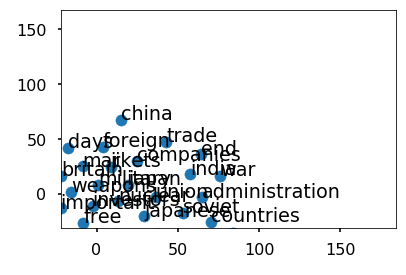

In [416]:
display_closestwords_tsnescatterplot(model, 'china')